In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/Users/hstrey/Downloads/dogs-vs-cats-redux-kernels-edition"))

['.DS_Store', 'test', 'test.zip', 'train', 'train.zip', 'sample_submission.csv']


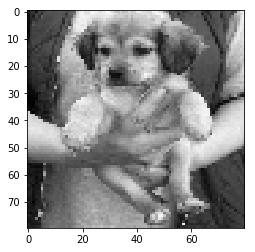

In [4]:
main_dir = "/Users/hstrey/Downloads/dogs-vs-cats-redux-kernels-edition/"
train_dir = "train/"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [5]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [6]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [7]:
#Normalize data
X = X/255.0

In [9]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 158s 8ms/sample - loss: 0.6245 - acc: 0.6417 - val_loss: 0.5690 - val_acc: 0.7064
Epoch 2/10
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.5067 - acc: 0.7578 - val_loss: 0.5008 - val_acc: 0.7552
Epoch 3/10
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.4467 - acc: 0.7894 - val_loss: 0.4969 - val_acc: 0.7628
Epoch 4/10
20000/20000 [==============================] - 162s 8ms/sample - loss: 0.3954 - acc: 0.8191 - val_loss: 0.4570 - val_acc: 0.7846
Epoch 5/10
20000/20000 [==============================] - 1368s 68ms/sample - loss: 0.3362 - acc: 0.8526 - val_loss: 0.5370 - val_acc: 0.7682
Epoch 6/10
20000/20000 [==============================] - 1265s 63ms/sample - loss: 0.2677 - acc: 0.8881 - val_loss: 0.5042 - val_acc: 0.7900
Epoch 7/10
20000/20000 [==============================] - 1

In [21]:
train_dir = "test/"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_testI = np.array(X_test)
X_test = X_testI.reshape(-1,80,80,1)/255

In [12]:
predictions = model.predict(X_test)

In [13]:
predicted_val = [int(round(p[0])) for p in predictions]

In [ ]:
plt.imshow(X_testI[1],cmap="gray")

In [ ]:
for i,x in enumerate(X_test):
    print(model.predict(np.array([x]))[0])
    plt.figure()
    plt.imshow(X_testI[i],cmap="gray")